In [6]:
import qutip as qt
import matplotlib.pyplot as plt
import numpy as np

1001


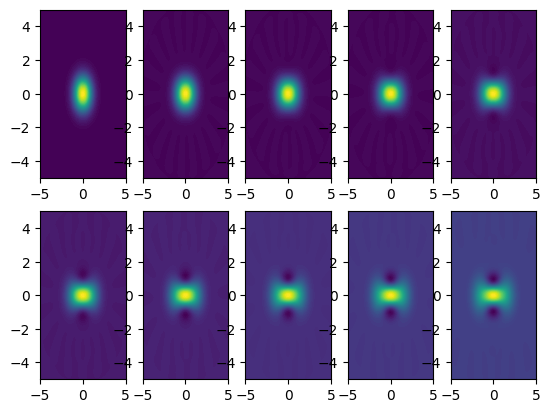

In [25]:
N = 20
initial_state = qt.coherent(N, 0)

# Initializing the constants:
delta = 1
tlist = np.linspace(0,10,1001)
m = 100
K = 100
h = 1

a = qt.destroy(N)
ad = qt.create(N)

psi0 = qt.coherent(N,0)

# Initializing the Hamiltonian
def Parameter(t):
    return m * t

H1 = h*delta*ad*a + h*(K/2)*(ad**2)*(a**2) - (qt.coefficient(Parameter))*(a**2 + ad**2)*(h/2.0)

# Solving Schrodinger's Equation
result = qt.mesolve(H1,psi0,tlist=tlist,c_ops=[])
final_state = result.states[-1]
print(len(result.states))

# Plot the Wigner function
fig, axs = plt.subplots(2,5)

for i in [0,1]:
    for j in range(5):
        xvec = np.linspace(-5, 5, 500)
        W = qt.wigner(result.states[i*500 + j*100], xvec, xvec)
        axs[i][j].contourf(xvec, xvec, W, 100)